In [2]:
setwd("~/projects/next_gen_attribution/src/analysis/R/pg")

source("~/R_connector/libraries.R")
#mozart <- connToEDW(dataBase = "Mozart", connType = 'normal', user = 'pgurican', pass=trimws(read_file("~/R_connector/p.txt")))
hopper <- connToEDW(dataBase = "Hopper", connType = 'normal', user = 'pgurican', pass=trimws(read_file("~/R_connector/p.txt")))

Loading required package: DBI
Loading required package: rJava
------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [14]:
q <-  "select pblshr_id as pblshr_id, 
group_id, 
count(*) as no_clicks
from p_flex_pool_t.ams_clicks_on_test
group by PBLSHR_ID, group_id
"

counts_publishers <- dbGetQuery(conn = hopper, q)

In [15]:
counts_publishers %<>% arrange(desc(no_clicks), pblshr_id, group_id) %>% filter(group_id >= 0)

In [15]:
head(counts_publishers)

pblshr_id  group_id no_clicks
1 5574971870 1        513307   
2 5574862062 1        260653   
3 5574867444 1        242615   
4 5575086808 1        158201   
5 5574862062 0        155577   
6 5575023814 1        150579

In [16]:
counts_publishers %<>% spread(key = pblshr_id, value = no_clicks, fill = 0) %>% 
    gather(pblshr_id, no_clicks, -group_id, convert = TRUE) %>% 
    arrange(desc(no_clicks), pblshr_id, group_id)

In [19]:
counts_by_groups <- counts_publishers %>% spread(key = group_id, value = no_clicks, fill = 0) %>%     arrange(desc(`1`), pblshr_id)

In [9]:
counts_by_groups <- counts_publishers %>% reshape2::dcast(pblshr_id ~ group_id, value.var ="no_clicks")

In [10]:
counts_by_groups

pblshr_id  0    1   
1           999  196  455
2    1000000000    3    6
3    5574628243   77  106
4    5574628244  134  765
5    5574628248  255  687
6    5574628249    0    1
7    5574628252 1022   38
8    5574628253   45   23
9    5574628271   33   29
10   5574628905   10   16
11   5574628922    3    9
12   5574628947   73  134
13   5574628948  128 1319
14   5574628954  156   71
15   5574628971    1   10
16   5574628981  447  287
17   5574628985   46   38
18   5574628986    7   15
19   5574628992    9    2
20   5574629005    1   20
21   5574629010    1    6
22   5574629013   28   44
23   5574629024    8  134
24   5574629027    0    2
25   5574629033   50  170
26   5574629046   11    9
27   5574629049    0    1
28   5574629058    6    6
29   5574629059  637  918
30   5574629064    0    2
⋮    ⋮          ⋮    ⋮   
4814 5575323238  1    0  
4815 5575323266  0    2  
4816 5575323298  1    1  
4817 5575323486  5    7  
4818 5575323555 20   26  
4819 5575323834  2    0  
4820 5575323881  1    0  
4821 5575323928  0    3  
4822 5575324248  1    0  
4823 5575324327  1    0  
4824 5575324520  1    0  
4825 5575324564  1    3  
4826 5575324609  4    3  
4827 5575324766  1    1  
4828 5575324841 11   18  
4829 5575325048  0    1  
4830 5575325065  1    1  
4831 5575325150 10    0  
4832 5575325268  1    0  
4833 5575325273  3    0  
4834 5575325397  1    0  
4835 5575325696  3    0  
4836 5575325735 18   12  
4837 5575325873  0    1  
4838 5575325880  0    1  
4839 5575326230  1    3  
4840 5575326434  1    0  
4841 5575327059  4    1  
4842 5575327560  1    0  
4843 5575328288  1    1

In [20]:
similarity <- counts_by_groups %>% 
        group_by(pblshr_id) %>% 
        summarise(similarity = (`1` - `0`)/ (`1` + `0`)) %>%
        arrange(similarity)

similarity$pblshr_id <- as.factor(similarity$pblshr_id)

In [21]:
similarity$id <- 1:nrow(similarity)

In [22]:
similarity

pblshr_id  similarity id  
1    5574629251 -1          1  
2    5574629270 -1          2  
3    5574629362 -1          3  
4    5574629416 -1          4  
5    5574629577 -1          5  
6    5574629597 -1          6  
7    5574629705 -1          7  
8    5574629707 -1          8  
9    5574630018 -1          9  
10   5574630309 -1         10  
11   5574630364 -1         11  
12   5574630513 -1         12  
13   5574630997 -1         13  
14   5574631011 -1         14  
15   5574631072 -1         15  
16   5574631237 -1         16  
17   5574631269 -1         17  
18   5574631357 -1         18  
19   5574631578 -1         19  
20   5574631642 -1         20  
21   5574631766 -1         21  
22   5574631768 -1         22  
23   5574631925 -1         23  
24   5574632038 -1         24  
25   5574632053 -1         25  
26   5574632081 -1         26  
27   5574632163 -1         27  
28   5574632260 -1         28  
29   5574632572 -1         29  
30   5574632645 -1         30  
⋮    ⋮          ⋮          ⋮   
4814 5575315620 1          4814
4815 5575315630 1          4815
4816 5575316073 1          4816
4817 5575316136 1          4817
4818 5575316340 1          4818
4819 5575316851 1          4819
4820 5575317132 1          4820
4821 5575317242 1          4821
4822 5575317347 1          4822
4823 5575317450 1          4823
4824 5575318183 1          4824
4825 5575318447 1          4825
4826 5575318557 1          4826
4827 5575318614 1          4827
4828 5575319561 1          4828
4829 5575319696 1          4829
4830 5575319892 1          4830
4831 5575321529 1          4831
4832 5575321636 1          4832
4833 5575321641 1          4833
4834 5575321983 1          4834
4835 5575322117 1          4835
4836 5575322135 1          4836
4837 5575322274 1          4837
4838 5575322830 1          4838
4839 5575323266 1          4839
4840 5575323928 1          4840
4841 5575325048 1          4841
4842 5575325873 1          4842
4843 5575325880 1          4843

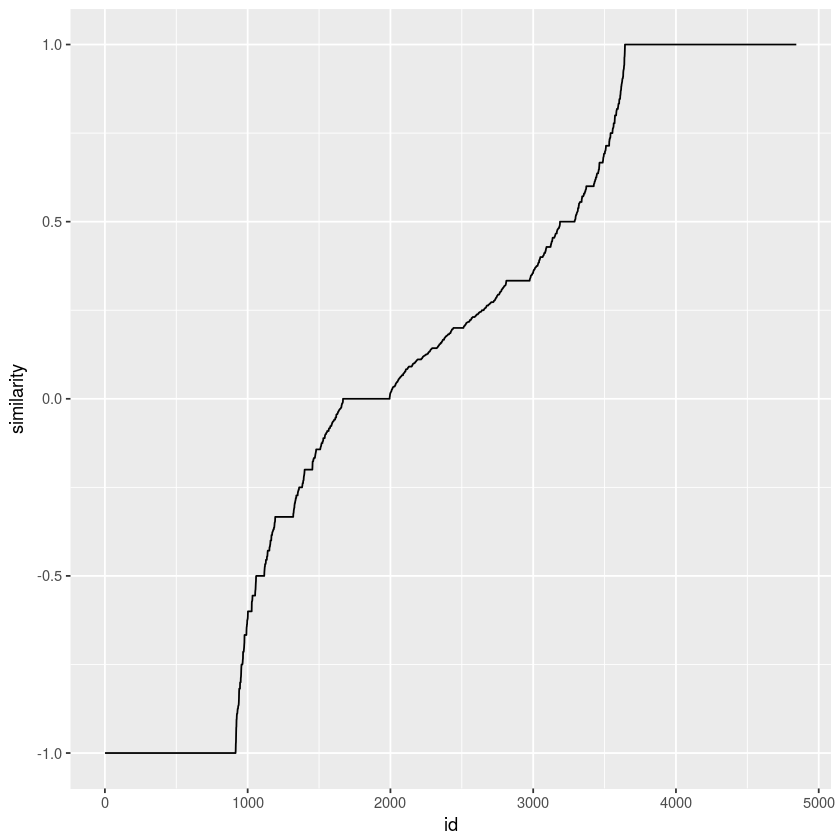

In [23]:
ggplot(similarity, aes(x = id, y = similarity)) + geom_line()

In [24]:
eligible_publishers <- (counts_publishers %>% group_by(pblshr_id) %>% summarise(no_clicks = sum(no_clicks)) %>% filter(no_clicks >= 4000))$pblshr_id

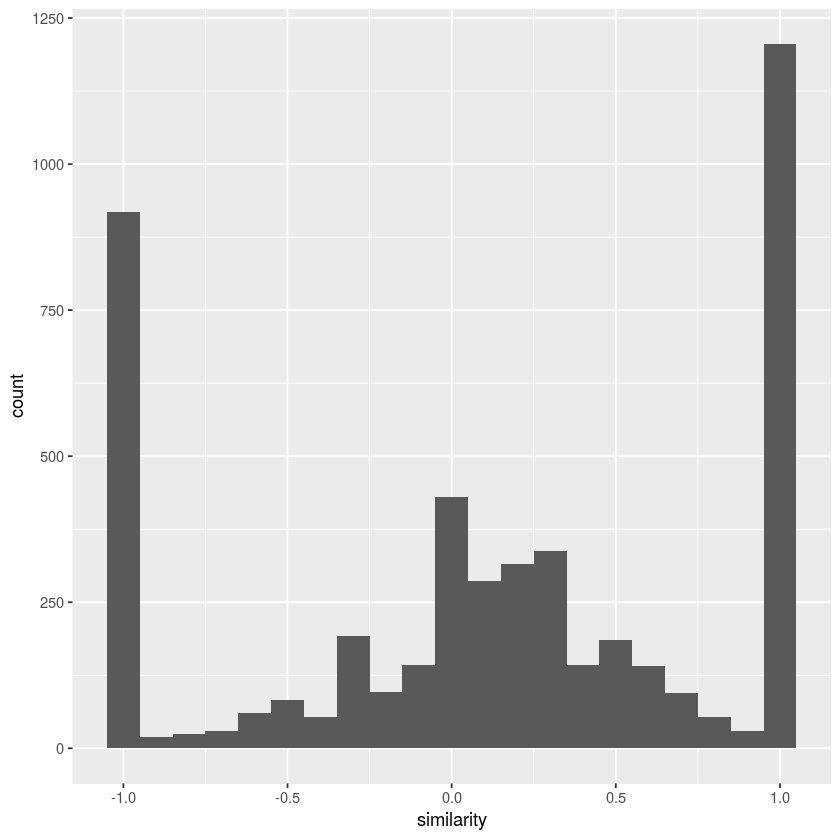

In [25]:
ggplot(similarity, 
       aes(similarity)) + geom_histogram(binwidth = 0.1)

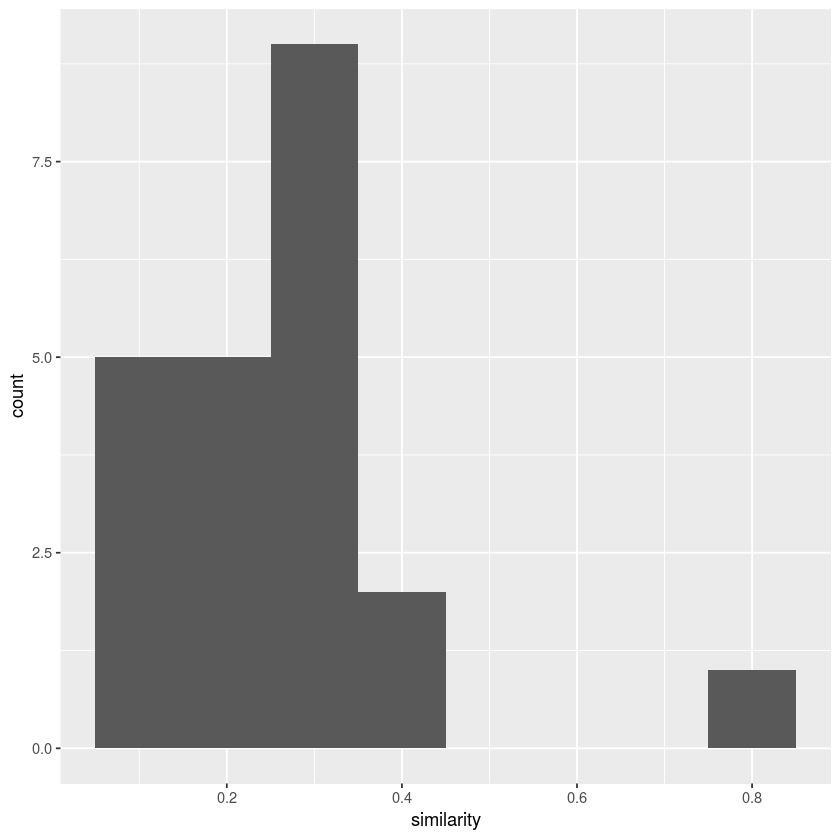

In [26]:
eligible_publishers <- (counts_publishers %>% group_by(pblshr_id) %>% summarise(no_clicks = sum(no_clicks)) %>% filter(no_clicks >= 15000))$pblshr_id
ggplot(similarity %>% filter(pblshr_id %in% eligible_publishers), 
       aes(similarity)) + geom_histogram(binwidth = 0.1)

In [27]:
eligible_publishers

[1] 5574635388 5574651234 5574653249 5574672411 5574704422 5574713606
 [7] 5574717700 5574735181 5574862062 5574867444 5574907506 5574933636
[13] 5574959657 5574971870 5575023613 5575023814 5575086808 5575089079
[19] 5575153109 5575154502 5575176189 5575245877

In [28]:
top_publishers <- paste(eligible_publishers, sep = "", collapse = ", ")

In [75]:
q2 <- paste("
select 
click_id,
crltn_guid_txt as cguid,
pblshr_id,
ams_pblshr_cmpgn_id,
click_dt,
group_id

from PRS_AMS_V.AMS_CLICK A
inner join P_FLEX_POOL_T.RAS_impressions_cguids B
ON A.crltn_guid_txt = B.cguid

where click_dt between \'2017-06-01\' and \'2017-09-30\'
and pblshr_id in (",
top_publishers, ")", sep = "")

In [76]:
epn_sessions <- dbGetQuery(conn = hopper, q2)

In [33]:
head(epn_sessions)

CLICK_ID     cguid                            PBLSHR_ID  AMS_PBLSHR_CMPGN_ID
1 1.259093e+12 c480832e1540a602d0c00390fae0799c 5574856952 5337833804         
2 1.239973e+12 11e51e811590aa12eb543f6be5cec8e4 5575089079 5337506132         
3 1.258708e+12 e399738215a0ab4caf55e9d3f52903f2 5575086808 5337674827         
4 1.261792e+12 a7a44d6d1590a9cae0140329f5c247a6 5574971870 5337076272         
5 1.318681e+12 15a3373315d0a88363346d22faa0eb31 5575086808 5337674829         
6 1.241465e+12 d54db4101550a7e471960616fa68c08e 5574672411 5337314663         
  CLICK_DT   group_id
1 2017-07-16 1       
2 2017-06-23 0       
3 2017-07-15 1       
4 2017-07-19 0       
5 2017-09-24 1       
6 2017-06-25 0

In [ ]:
unique(epn_sessions$CLICK_DT)

In [77]:
epn_sessions_lift <- epn_sessions %>% 
    filter(group_id >= 0) %>% 
    group_by(PBLSHR_ID, CLICK_DT,group_id) %>% 
    summarise(no_events = n()) %>% 
    dcast(PBLSHR_ID + CLICK_DT ~ group_id, value.var = "no_events") %>%
    group_by(PBLSHR_ID, CLICK_DT) %>%
    summarise(lift = `0`/`1` - 1)
    
epn_sessions_lift$CLICK_DT <- as.Date(epn_sessions_lift$CLICK_DT)
epn_sessions_lift$PBLSHR_ID <- as.factor(epn_sessions_lift$PBLSHR_ID)

In [ ]:
unique(epn_sessions_lift$CLICK_DT)

In [37]:
library(highcharter)

Highcharts (www.highcharts.com) is a Highsoft software product which is
not free for commercial and Governmental use


In [78]:
hchart(epn_sessions_lift,
    type = "line",
       hcaes(x = CLICK_DT,
           y = lift,
           group = PBLSHR_ID)) %>%
    hc_size(height = 800)

HTML widgets cannot be represented in plain text (need html)

Highcharts (www.highcharts.com) is a Highsoft software product which is
not free for commercial and Governmental use


In [29]:
q3 <- paste("
select 
click_id,
crltn_guid_txt as cguid,
pblshr_id,
ams_pblshr_cmpgn_id,
click_dt,
group_id,
C.pblshr_cmpny_name,
case
    when coalesce(C.ADVRTSNG_PBLSHR_BSNS_MODEL_ID, C.PBLSHR_BSNS_MODEL_ID, -999) = 1 then \'OCS\'
    when coalesce(C.ADVRTSNG_PBLSHR_BSNS_MODEL_ID, C.PBLSHR_BSNS_MODEL_ID, -999) in (2,3) then \'Content\'
    when coalesce(C.ADVRTSNG_PBLSHR_BSNS_MODEL_ID, C.PBLSHR_BSNS_MODEL_ID, -999) =4 then\'Loyalty\'
    else \'Other\' end as BM

from PRS_AMS_V.AMS_CLICK A
inner join P_FLEX_POOL_T.RAS_impressions_cguids B
ON A.crltn_guid_txt = B.cguid
inner join prs_ams_v.AMS_PBLSHR C
ON A.pblshr_id = C.ams_pblshr_id

where click_dt between \'2017-06-01\' and \'2017-09-30\'
and pblshr_id in (",
top_publishers, ")", sep = "")

In [30]:
epn_sessions_names <- dbGetQuery(conn = hopper, q3)

In [44]:
epn_sessions_names$PBLSHR_CMPNY_NAME <- paste(epn_sessions_names$PBLSHR_CMPNY_NAME, epn_sessions_names$BM, sep = " | ")

In [53]:
epn_sessions_names

CLICK_ID     cguid                            PBLSHR_ID 
1       1.289237e+12 11ea605d15a0ab1dacb4c0f1faa91467 5574971870
2       1.296668e+12 30bb5a7115e0ab64f3f7cbede14febba 5575086808
3       1.288655e+12 fff3df6615d0abda50a75985e90e8b57 5574867444
4       1.294337e+12 23ad795b15e0ac88f0a3c08ee3a0af6b 5574971870
5       1.283693e+12 011b2e0614d0a2afe1056635f9f818f8 5574971870
6       1.249284e+12 d54db4101550a7e471960616fa68c08e 5574672411
7       1.270844e+12 a045a4ba1570abc037346889fc507646 5574971870
8       1.294792e+12 3efe91a215c0a9c4052756c0f4ac6eca 5574862062
9       1.299725e+12 1712740c15e0aa415281099bee10b3c9 5574971870
10      1.226563e+12 42537a2715b0aa42dea590c6ff382596 5574862062
11      1.303103e+12 7c1b7d3c14f0a7e308f3b333fe4b00c3 5575086808
12      1.270717e+12 509be41a15c0a7f244e7a4c0f26f5254 5574862062
13      1.297734e+12 92d3d1dd1590aa1a32962c55fe7693ae 5574971870
14      1.292962e+12 fc81f9bd1520a7ea05b3bfc3f96b1bdb 5575023613
15      1.301184e+12 298ee79615e0ab1da335e7faffddc6b2 5574862062
16      1.296165e+12 fa0fd5851510a6296ec57905e5b7690a 5574971870
17      1.285753e+12 6052f84515c0ab1465200927f13bdc86 5575086808
18      1.292809e+12 13890b111560a620b6363d16fed6a71d 5574867444
19      1.224276e+12 82c7ce191590a88353a13a44c21082a9 5574971870
20      1.289731e+12 a6e8f26015c0aa131a761b46ff36cb92 5575023814
21      1.291141e+12 d8f10d561530a7e3f6b7abb7f2e082fe 5574867444
22      1.302212e+12 dc02f17815d0aaa337e46887f54b2e05 5574672411
23      1.275524e+12 1b895f8d15b0ab137311b85cffa4efab 5575176189
24      1.254076e+12 b0e6ff6b1510a62a0de589b5ead74b3e 5575245877
25      1.276711e+12 57b9772415d0a8889163f4e0f6f69509 5575023613
26      1.258147e+12 8c279b1a15c0aa126f16e6d3f02e25db 5574867444
27      1.286324e+12 921d2ba11470a5f145a50dd5f71502a9 5574971870
28      1.241660e+12 069db9a21570aa136152c69ffb35fe9b 5575176189
29      1.297572e+12 5f54c29615d0aa4901a362f9f981281a 5574971870
30      1.269415e+12 22bf9b2615d0a991e2f6026dff784235 5575023613
⋮       ⋮            ⋮                                ⋮         
3513199 1.270223e+12 f012a13b14e0a56a86273c27fdf7c292 5574867444
3513200 1.267011e+12 3a0c371f15b0a9c09be4ffd8ff74bda7 5575086808
3513201 1.309801e+12 3a0c371f15b0a9c09be4ffd8ff74bda7 5574971870
3513202 1.301818e+12 198036af15b0a866e6118aa8fff96c37 5574971870
3513203 1.278727e+12 f012a13b14e0a56a86273c27fdf7c292 5574971870
3513204 1.288485e+12 3a0c371f15b0a9c09be4ffd8ff74bda7 5575086808
3513205 1.263805e+12 a6f5cae21580aa4768c33f55f47873ce 5575023613
3513206 1.293764e+12 f012a13b14e0a56a86273c27fdf7c292 5575023613
3513207 1.258496e+12 f012a13b14e0a56a86273c27fdf7c292 5574971870
3513208 1.298633e+12 d3c6639c1580abd98dd1a797e04428cc 5574971870
3513209 1.274235e+12 f012a13b14e0a56a86273c27fdf7c292 5574971870
3513210 1.316876e+12 f012a13b14e0a56a86273c27fdf7c292 5575086808
3513211 1.258509e+12 f012a13b14e0a56a86273c27fdf7c292 5574971870
3513212 1.225412e+12 f012a13b14e0a56a86273c27fdf7c292 5575086808
3513213 1.231656e+12 a2ba428815c0ab19d4113f56ff7941f5 5574862062
3513214 1.311553e+12 f012a13b14e0a56a86273c27fdf7c292 5575086808
3513215 1.288887e+12 f012a13b14e0a56a86273c27fdf7c292 5575086808
3513216 1.307416e+12 d4781d0a15c0aa13ab63497cfac8a789 5574635388
3513217 1.283382e+12 7d141c6c1520a5f144225192f80352fb 5574971870
3513218 1.288552e+12 3a0c371f15b0a9c09be4ffd8ff74bda7 5575086808
3513219 1.295621e+12 21967cd615e0aa18b7735db5ecdb4075 5574867444
3513220 1.292127e+12 3a0c371f15b0a9c09be4ffd8ff74bda7 5575086808
3513221 1.317591e+12 f012a13b14e0a56a86273c27fdf7c292 5574862062
3513222 1.259090e+12 3a0c371f15b0a9c09be4ffd8ff74bda7 5574867444
3513223 1.237159e+12 6b22d5bb1460a5f165f0da00ffe26f39 5574862062
3513224 1.284639e+12 de61127a15b0a884df24d5a2e83e4dcb 5574971870
3513225 1.270233e+12 f012a13b14e0a56a86273c27fdf7c292 5574867444
3513226 1.272838e+12 f012a13b14e0a56a86273c27fdf7c292 5575086808
3513227 1.272629e+12 f012a13b14e0a56a86273c27fdf7c292 5574971870
3513228 1.272603e+12 f012a13b14e0a56a86273c

In [54]:
epn_sessions_lift <- epn_sessions_names %>% 
    filter(group_id >= 0) %>% 
    group_by(BM, PBLSHR_CMPNY_NAME, CLICK_DT,group_id) %>% 
    summarise(no_events = n()) %>% 
    dcast(BM + PBLSHR_CMPNY_NAME + CLICK_DT ~ group_id, value.var = "no_events") %>%
    group_by(BM, PBLSHR_CMPNY_NAME, CLICK_DT) %>%
    summarise(lift = `0`/`1` - 1)
    
epn_sessions_lift$CLICK_DT <- as.Date(epn_sessions_lift$CLICK_DT)
epn_sessions_lift$PBLSHR_CMPNY_NAME <- as.factor(epn_sessions_lift$PBLSHR_CMPNY_NAME)

In [55]:
epn_sessions_lift

BM      PBLSHR_CMPNY_NAME                  CLICK_DT   lift       
1    Content Barefruit Ltd | Content            2017-06-01 -0.08641975
2    Content Barefruit Ltd | Content            2017-06-02 -0.47727273
3    Content Barefruit Ltd | Content            2017-06-03 -0.37500000
4    Content Barefruit Ltd | Content            2017-06-04 -0.45454545
5    Content Barefruit Ltd | Content            2017-06-05 -0.28947368
6    Content Barefruit Ltd | Content            2017-06-06 -0.16666667
7    Content Barefruit Ltd | Content            2017-06-07 -0.58163265
8    Content Barefruit Ltd | Content            2017-06-08 -0.36781609
9    Content Barefruit Ltd | Content            2017-06-09 -0.44444444
10   Content Barefruit Ltd | Content            2017-06-10 -0.19672131
11   Content Barefruit Ltd | Content            2017-06-11 -0.23170732
12   Content Barefruit Ltd | Content            2017-06-12 -0.38202247
13   Content Barefruit Ltd | Content            2017-06-13 -0.35526316
14   Content Barefruit Ltd | Content            2017-06-14 -0.11428571
15   Content Barefruit Ltd | Content            2017-06-15  0.09459459
16   Content Barefruit Ltd | Content            2017-06-16 -0.33707865
17   Content Barefruit Ltd | Content            2017-06-17  0.13793103
18   Content Barefruit Ltd | Content            2017-06-18 -0.50000000
19   Content Barefruit Ltd | Content            2017-06-19 -0.27160494
20   Content Barefruit Ltd | Content            2017-06-20 -0.14754098
21   Content Barefruit Ltd | Content            2017-06-21 -0.34146341
22   Content Barefruit Ltd | Content            2017-06-22 -0.10526316
23   Content Barefruit Ltd | Content            2017-06-23 -0.41489362
24   Content Barefruit Ltd | Content            2017-06-24 -0.48192771
25   Content Barefruit Ltd | Content            2017-06-25 -0.23750000
26   Content Barefruit Ltd | Content            2017-06-26 -0.21176471
27   Content Barefruit Ltd | Content            2017-06-27 -0.31683168
28   Content Barefruit Ltd | Content            2017-06-28 -0.31958763
29   Content Barefruit Ltd | Content            2017-06-29 -0.67375887
30   Content Barefruit Ltd | Content            2017-06-30 -0.45967742
⋮    ⋮       ⋮                                  ⋮          ⋮          
2567 Other   United Internet Media GmbH | Other 2017-08-28 -0.23929471
2568 Other   United Internet Media GmbH | Other 2017-08-29  0.30097087
2569 Other   United Internet Media GmbH | Other 2017-08-30 -0.07936508
2570 Other   United Internet Media GmbH | Other 2017-08-31 -0.16019417
2571 Other   United Internet Media GmbH | Other 2017-09-01 -0.06451613
2572 Other   United Internet Media GmbH | Other 2017-09-02 -0.16975309
2573 Other   United Internet Media GmbH | Other 2017-09-03 -0.31531532
2574 Other   United Internet Media GmbH | Other 2017-09-04 -0.20630372
2575 Other   United Internet Media GmbH | Other 2017-09-05 -0.05921053
2576 Other   United Internet Media GmbH | Other 2017-09-06 -0.24013158
2577 Other   United Internet Media GmbH | Other 2017-09-07 -0.07142857
2578 Other   United Internet Media GmbH | Other 2017-09-08 -0.40666667
2579 Other   United Internet Media GmbH | Other 2017-09-09 -0.24110672
2580 Other   United Internet Media GmbH | Other 2017-09-10 -0.07661290
2581 Other   United Internet Media GmbH | Other 2017-09-11 -0.11742424
2582 Other   United Internet Media GmbH | Other 2017-09-12 -0.22857143
2583 Other   United Internet Media GmbH | Other 2017-09-13 -0.07865169
2584 Other   United Internet Media GmbH | Other 2017-09-14 -0.25605536
2585 Other   United Internet Media GmbH | Other 2017-09-15 -0.17647059
2586 Other   United Internet Media GmbH | Other 2017-09-16 -0.19597990
2587 Other   United Internet Media GmbH | Other 2017-09-17 -0.14227642
2588 Other   United Internet Media GmbH | Other 2017-09-18 -0.12019231
2589 Other   United Internet Media GmbH | Other 2017-09-19 -0.09170306
2590 Other   United Internet Media GmbH | Other 2017-09-20 -0.07079646
2591 Other   United Internet 

In [58]:
hchart(epn_sessions_lift %>% filter(BM == "OCS"),
       type = "line",
       hcaes(x = CLICK_DT,
           y = lift,
           group = PBLSHR_CMPNY_NAME),
       visible = TRUE ) %>%
    hc_size(height = 800) %>%
    hc_exporting(enabled = TRUE)

HTML widgets cannot be represented in plain text (need html)

In [57]:
hchart(epn_sessions_lift %>% filter(BM != "OCS"),
       type = "line",
       hcaes(x = CLICK_DT,
           y = lift,
           group = PBLSHR_CMPNY_NAME),
       visible = TRUE ) %>%
    hc_size(height = 800) %>%
    hc_exporting(enabled = TRUE)

HTML widgets cannot be represented in plain text (need html)